In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
np.random.seed(5)
X, Y = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[2,-2], [1,3], [-2,-2]])

X = np.vstack((X[Y==0], X[Y==1], X[Y==2]))
Y = np.hstack((Y[Y==0], Y[Y==1], Y[Y==2]))

In [3]:
Y2 = []
for i in range(len(Y)):
    arr = np.zeros((3,1))
    arr[Y[i],0] = 1
    Y2.append(arr)
Y2 = np.array(Y2).reshape(-1, 3)


In [4]:
Y2.shape

(1000, 3)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

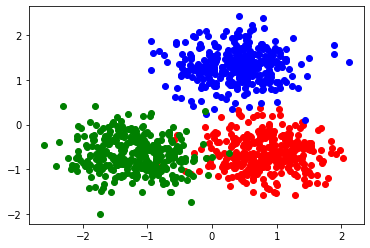

In [6]:
#Plot all data
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], c="r")
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], c="b")
plt.scatter(X[Y==2][:,0], X[Y==2][:,1], c="g")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y2, test_size=0.3)

In [8]:
import sys
sys.path.append('../../')
import keras.keras as keras

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(2),
    keras.layers.Dense(3, activation="softmax"),
])

In [35]:
model.compile(learning_rate=0.001, loss="categorical_crossentropy", optimizer="adam")

In [36]:
model.fit(X_train.T, Y_train.T, X_val.T, Y_val.T, epochs=4000)

Training loss: 0.13358974108399072
Validation loss: 0.1038295814694186


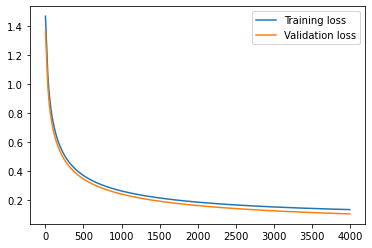

In [37]:
plt.plot(range(len(model.history["train_loss"])), model.history["train_loss"], label="Training loss")
plt.plot(range(len(model.history["val_loss"])), model.history["val_loss"], label="Validation loss")

plt.legend()

print("Training loss:", model.history["train_loss"][-1])
print("Validation loss:", model.history["val_loss"][-1])

plt.show()


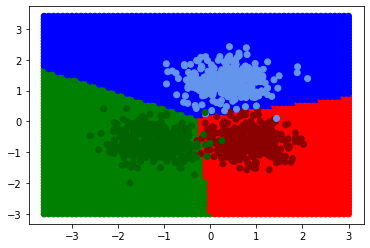

In [38]:
import matplotlib

x1 = np.arange(min(X_train[:,0])-1, max(X_train[:, 0]) +1 , 0.1)
x2 = np.arange(min(X_train[:,1])-1, max(X_train[:, 1]) +1 , 0.1)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = np.ravel(xx1)
xx2 = np.ravel(xx2)
x = np.vstack((xx1, xx2))
y = model.predict(x)

y = np.argmax(y, axis=0)


colors = ["red", "blue", "green"]

plt.scatter(xx1, xx2, c=y, cmap=matplotlib.colors.ListedColormap(colors))

colors = ["darkred", "cornflowerblue", "darkgreen"]
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()